In [30]:
import phys
import numpy as np
import phys.light
import phys.newton
import time

sim = phys.Simulation({"cl_on": True, "exit": lambda cond: cond.t >= 0.100})

sim.add_step(2, phys.UpdateTimeStep(lambda c: 0.005))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
sim.add_step(3, phys.light.ScatterSphericalStep(0.0001, 0.001))
tp = phys.light.TracePathMeasureStep(None)
sim.add_step(0, tp)

sim.add_objs(phys.light.generate_photons(1000, bins=10, dist="gauss", min=phys.light.E_from_wavelength(200e-9), max=phys.light.E_from_wavelength(700e-9)))

In [31]:
sim.start()

while sim.running:
    time.sleep(0.1)
    print(sim.get_state())

{'objects': 1452, 't': 0.025, 'dt': 0.005, 'run_time': 0.11290884017944336}
{'objects': 1452, 't': 0.045, 'dt': 0.005, 'run_time': 0.22081494331359863}
{'objects': 1452, 't': 0.06999999999999999, 'dt': 0.005, 'run_time': 0.33272814750671387}
{'objects': 1452, 't': 0.09000000000000001, 'dt': 0.005, 'run_time': 0.43967223167419434}
{'objects': 1452, 't': 0.10000000000000002, 'dt': 0.005, 'run_time': 0.546579122543335}


In [3]:
tp.data[0]

['t',
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.07,
 0.08,
 0.09,
 0.09999999999999999,
 0.10999999999999999]

In [4]:
tp.data[1]

["<class 'phys.light.PhotonObject'>",
 array([2997924.58,       0.  ,       0.  ]),
 array([3237714.56864949, 2344623.91200734, 1852779.33385362]),
 array([4966508.97312989,  607672.52906491,  125984.15558266]),
 array([ 5978735.25403981, -1621246.07502846, -1604585.57717297]),
 array([ 8776941.59651205, -1385197.74809369,  -554883.60057789]),
 array([10891529.121122  ,   -70896.23540201, -2224818.60586058]),
 array([10946773.88177669,  -192056.07950855,   770147.18625867]),
 array([10808310.39857936,  2343481.22090346,  2363706.17462666]),
 array([11824362.14451068,  3215589.00884606,  -318572.45429464]),
 array([12777407.31919194,  4007278.55540682, -3048496.32580669]),
 array([11228340.71091654,  6573914.81584006, -3030531.43995726])]

In [5]:
tp.data[2]

["<class 'phys.light.PhotonObject'>",
 array([2997924.58,       0.  ,       0.  ]),
 array([ 1103952.28420949, -1387750.62064392, -1864019.56670219]),
 array([   77465.50415241,   660772.38046537, -3797263.0049847 ]),
 array([ -125486.1672007 ,  -247653.84667472, -6647021.62569404]),
 array([  -80012.52883037,   -87003.96323779, -3653749.91224515]),
 array([  978694.08144748, -2778168.36962396, -2863606.73628125]),
 array([  161687.8917504 , -4896846.79042065,  -906247.69343416]),
 array([ 1191704.93069212, -4341741.6867778 ,  1853910.81845743]),
 array([ 1307000.89163327, -4410024.46219747, -1141017.57656971]),
 array([ -224804.91214286, -6961858.66724436, -1500551.93770738]),
 array([ -342007.20920291, -6815000.6468493 , -4492582.70806681])]

In [6]:
tp.data[0:3]

[['t',
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.060000000000000005,
  0.07,
  0.08,
  0.09,
  0.09999999999999999,
  0.10999999999999999],
 ["<class 'phys.light.PhotonObject'>",
  array([2997924.58,       0.  ,       0.  ]),
  array([3237714.56864949, 2344623.91200734, 1852779.33385362]),
  array([4966508.97312989,  607672.52906491,  125984.15558266]),
  array([ 5978735.25403981, -1621246.07502846, -1604585.57717297]),
  array([ 8776941.59651205, -1385197.74809369,  -554883.60057789]),
  array([10891529.121122  ,   -70896.23540201, -2224818.60586058]),
  array([10946773.88177669,  -192056.07950855,   770147.18625867]),
  array([10808310.39857936,  2343481.22090346,  2363706.17462666]),
  array([11824362.14451068,  3215589.00884606,  -318572.45429464]),
  array([12777407.31919194,  4007278.55540682, -3048496.32580669]),
  array([11228340.71091654,  6573914.81584006, -3030531.43995726])],
 ["<class 'phys.light.PhotonObject'>",
  array([2997924.58,       0.  ,       0.  ]),
  array([ 1

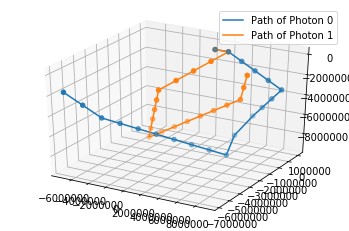

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in [0, 1]:
    xs = [x[0] for x in tp.data[1 + i][1:]]
    ys = [x[1] for x in tp.data[1 + i][1:]]
    zs = [x[2] for x in tp.data[1 + 1][1:]]
    ax.plot(xs, ys, zs, label="Path of Photon " + str(i))
    ax.scatter(xs, ys, zs)
ax.legend()

plt.show()